In [1]:
import RTBridge as rtb
import numpy as np
from functions import *
from scipy.signal import stft
import scipy.signal as signal
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
import wave
from sklearn.preprocessing import MinMaxScaler

In [2]:
sxx = spect_preprocessing('./Babbling_v04.wav',15000)


activation = np.loadtxt('./Activations/Experiment_v0_04_activations.txt')[100:,:]
model = inverse_mapping_func(np.transpose(sxx),activation,0.1)

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:118: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/20


2023-05-03 18:47:48.926279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-03 18:47:48.926813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-05-03 18:47:49.038735: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/422 [..............................] - ETA: 2:25 - loss: 0.6751 - mse: 0.1298

2023-05-03 18:47:49.240733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 3s 5ms/step - loss: 0.5721 - mse: 0.1207 - val_loss: 0.5721 - val_mse: 0.1303
Epoch 2/20
  1/422 [..............................] - ETA: 2s - loss: 0.5578 - mse: 0.1170

2023-05-03 18:47:51.538226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 2s 5ms/step - loss: 0.5583 - mse: 0.1195 - val_loss: 0.5723 - val_mse: 0.1306
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5577 - mse: 0.1193 - val_loss: 0.5729 - val_mse: 0.1310
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5572 - mse: 0.1192 - val_loss: 0.5731 - val_mse: 0.1311
Epoch 5/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5570 - mse: 0.1190 - val_loss: 0.5749 - val_mse: 0.1321
Epoch 6/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5566 - mse: 0.1189 - val_loss: 0.5742 - val_mse: 0.1317
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5564 - mse: 0.1188 - val_loss: 0.5753 - val_mse: 0.1324
Epoch 8/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5562 - mse: 0.1187 - val_loss: 0.5758 - val_mse: 0.1326
Epoch 9/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5560 - mse:

469/469 [==============================] - 1s 2ms/step


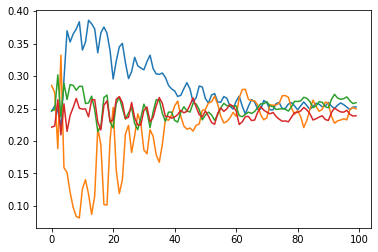

In [5]:
x = model.predict(np.transpose(sxx))
plt.plot(x[100:200,:])

In [8]:
import tensorflow as tf
from keras import layers

def create_model(music_spect,limb_activations,test_size):

    x_train, y_train, x_test, y_test = train_test_split(music_spect,limb_activations,test_size)
    num_classes = np.shape(limb_activations)[-1]
    input_shape = np.shape(x_train)+(1,)
    
    model = tf.keras.Sequential()
    
    # Add a 2D convolutional layer with 32 filters, a kernel size of (3, 3), and ReLU activation function
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    
    # Add a 2D max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add another 2D convolutional layer with 64 filters and a kernel size of (3, 3), followed by a max pooling layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add a third 2D convolutional layer with 128 filters and a kernel size of (3, 3), followed by a max pooling layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add a flatten layer to transform the output of the convolutional layers to a 1D vector
    model.add(layers.Flatten())
    
    # Add a dense layer with 512 units and a ReLU activation function
    model.add(layers.Dense(512, activation='relu'))
    
    # Add a dense layer with 4*100=400 units and a sigmoid activation function
    model.add(layers.Dense(4*np.shape(y_train)[0], activation='sigmoid'))
    
    # Reshape the output to a matrix with shape (4, 100)
    model.add(layers.Reshape(np.shape(y_train)[0]))
    
    # Compile the model with mean squared error loss and the Adam optimizer
    model.compile(loss='mse',
                  optimizer='adam')
    model.fit(x_test,y_train)
    
    return model

In [10]:
model = create_model(sxx,x,0.1)

ResourceExhaustedError: OOM when allocating tensor with shape[12946176,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator Simple allocator [Op:RandomUniform]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                5010      
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 5,054
Trainable params: 5,054
Non-trainable params: 0
_________________________________________________________________


/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


13/13 [==============================] - 0s 2ms/step


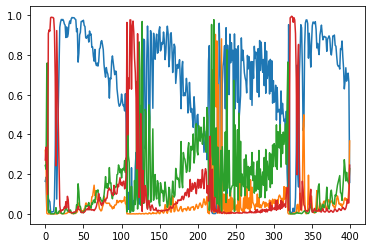

In [17]:
target_sxx = spect_preprocessing('./target_2.wav',400)
x = model.predict(np.transpose(target_sxx))
plt.plot(x)
np.savetxt('./train_activations/activation_3.txt',x)


In [5]:
x = np.loadtxt('./Activations/prescribed_activation.txt')

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_50582/1878782762.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read('./target_2.wav')


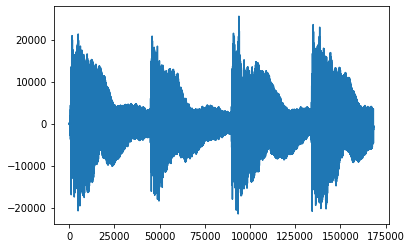

In [4]:
fs, music = wavfile.read('./target_2.wav')
music = music[:,1]
i1 = find_first_index(music)
i2 = find_last_index(music[i1:],i1,fs)
plt.plot(music[i1:i2])

In [15]:
new_sxx = np.concatenate((sxx,target_sxx),axis=1)
new_activations = np.concatenate((activation,x))

model = inverse_mapping_func(np.transpose(new_sxx),new_activations,0.1)

Epoch 1/50
  1/180 [..............................] - ETA: 1:00 - loss: 0.5754 - mse: 0.0901

2023-05-03 17:54:42.755135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


180/180 [==============================] - 2s 7ms/step - loss: 0.5144 - mse: 0.0889 - val_loss: 0.5029 - val_mse: 0.0942
Epoch 2/50
 24/180 [===>..........................] - ETA: 0s - loss: 0.4924 - mse: 0.0852

2023-05-03 17:54:44.013527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


180/180 [==============================] - 1s 5ms/step - loss: 0.4896 - mse: 0.0841 - val_loss: 0.4932 - val_mse: 0.0911
Epoch 3/50
180/180 [==============================] - 1s 5ms/step - loss: 0.4800 - mse: 0.0806 - val_loss: 0.4821 - val_mse: 0.0869
Epoch 4/50
180/180 [==============================] - 1s 5ms/step - loss: 0.4702 - mse: 0.0765 - val_loss: 0.4700 - val_mse: 0.0816
Epoch 5/50
180/180 [==============================] - 1s 6ms/step - loss: 0.4593 - mse: 0.0715 - val_loss: 0.4561 - val_mse: 0.0754
Epoch 6/50
180/180 [==============================] - 1s 5ms/step - loss: 0.4476 - mse: 0.0663 - val_loss: 0.4418 - val_mse: 0.0691
Epoch 7/50
180/180 [==============================] - 1s 6ms/step - loss: 0.4360 - mse: 0.0614 - val_loss: 0.4280 - val_mse: 0.0630
Epoch 8/50
180/180 [==============================] - 1s 5ms/step - loss: 0.4256 - mse: 0.0575 - val_loss: 0.4169 - val_mse: 0.0586
Epoch 9/50
180/180 [==============================] - 1s 5ms/step - loss: 0.4169 - mse: